In [1]:
import os, sys, importlib

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import maxwell as Maxwell, chi as Chi

import utilities.reduced_parameter as red
import field.electromagnetic as EM

The Maxwell distribution has the form:  

\begin{equation}
    f(v) = \sqrt{\frac{2}{\pi}} \frac{v^2}{a^3} \exp\left(-\frac{v^2}{2a^2}\right)
\end{equation}

with $a = \sqrt{m/(k_B T)}$, which is essentially the chi distribution with $k = 3$ and scale parameter $a = a$. The relation between Maxwell distribution and the general chi distribution has the form:

\begin{align*}
    \chi_k(x) &= \frac{1}{2^{(k/2) - 1} \Gamma(k/2)} x^{k-1} \exp(- x^2/2)
    \\
    \chi_3(x) &= \sqrt{\frac{2}{\pi}} x^2 \exp(- x^2/2)
    \\
    f(v) &= \chi_3(v/a)/a = \sqrt{\frac{2}{\pi}} \frac{v^2}{a^3} \exp\left(-\frac{v^2}{2a^2}\right)
\end{align*}

with $\Gamma(1/2) = \sqrt{\pi}$ and $\Gamma(3/2) = (1/2) \Gamma(1/2) = \sqrt{\pi}/2$. Thus Maxwell-Boltzmann distribution is equivalent to Chi-distribution with degree of freedom $k = 3$ and scale parameter $a = \sqrt{m/(k_B T)}$.

3.6745387507803784
2.437573378012797


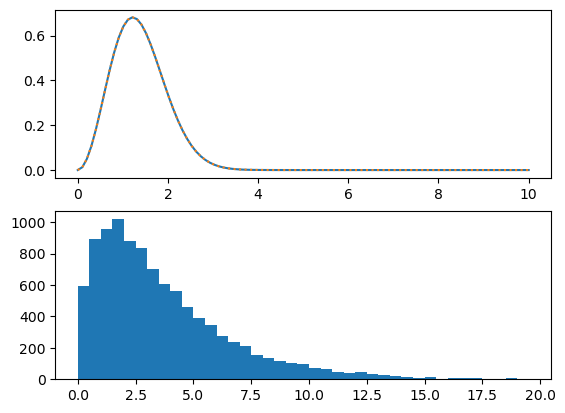

In [2]:
T = 292
T = 292 / red.temp # convert to reduced temperature unit, kb = 1

mass = red.mass_dict['Xe']

a = np.sqrt(T / mass)

maxwell_dist = Maxwell(scale = a)
chi_dist = Chi(3, scale = a)

fig, ax = plt.subplots(2)

x = np.linspace(0,10,100)
samples = maxwell_dist.rvs(size = 10000)

ax[0].plot(x, maxwell_dist.pdf(x))

ax[0].plot(x, chi_dist.pdf(x), linestyle = 'dotted')

energy_samples = 0.5 * mass * samples**2 
ax[1].hist(energy_samples, bins = np.arange(0,20,0.5))

print(np.mean(energy_samples))
print(T)

A multi-TM0-modes cavity field has energy determined as:
\begin{align*}
    E = \frac{1}{2\pi} \sum_k \frac{\omega_k^2}{c^2} [\Re(C_k)^2 + \Im(C_k)^2] =  \frac{1}{2\pi}\sum_k \frac{\omega_k^2}{c^2} (C_{kr}^2 + C_{ki}^2) 
\end{align*}

with the amplitude  

\begin{align*}
    C_k &= \Re(C_k) + i \Im(C_k) 
    \\
    &= C_{kr} + iC_{ki}
    \\
    & = C_{k0}[\cos(\theta) + i\sin(\theta)]
\end{align*}

Since each mode have 2 degree of freedom, a chi-distribution with $k = 2$ can be used to sample for $C_{k0}$. More specifically:
\begin{align*}
    f(C_{k0} ,\theta) \propto \exp\left( -\frac{\omega_k^2}{\pi c^2 k_B T} \frac{(C_{kr}^2 + C_{ki}^2)}{2}  \right) dC_{kr} dC_{ki}
\end{align*}

Normalizing the distribution give:
\begin{align*}
    f(C_{k0} ,\theta) &= \frac{\omega_k^2}{2\pi^2 c^2 k_B T} \exp\left( -\frac{\omega_k^2}{\pi c^2 k_B T} 
    \frac{(C_{kr}^2 + C_{ki}^2)}{2}  \right) dC_{kr} dC_{ki}
    \\
    &= \frac{\omega_k^2}{2\pi^2 c^2 k_B T} C_{k0} \exp\left( -\frac{\omega_k^2}{\pi c^2 k_B T} 
    \frac{C_{k0}^2}{2}  \right) dC_{k0} d\theta
\end{align*}

Finally, integrating out the theta from 0 to $2\pi$ give:
\begin{align*}
    f(C_{k0}) = \frac{\omega_k^2}{\pi c^2 k_B T} C_{k0} \exp\left( -\frac{\omega_k^2}{\pi c^2 k_B T} 
    \frac{C_{k0}^2}{2}  \right) dC_{k0}
\end{align*}


which is a chi-distribution with $k=2$ and scale parameter $a = \sqrt{\pi c^2 k_B T/ \omega_k^2} = \sqrt{\pi k_B T} / |k|$

2.432958183831176 2.437573378012797


1.216479091915588

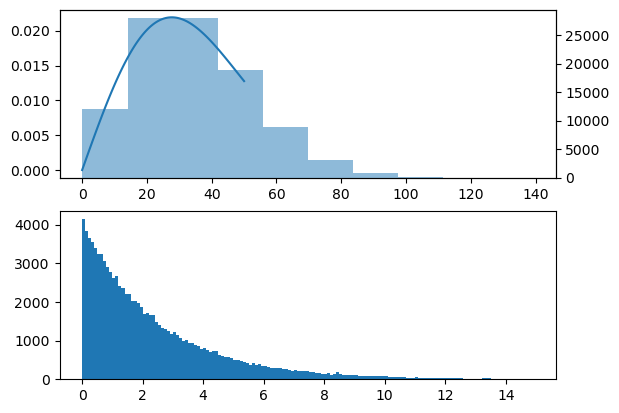

In [3]:
T = 292
T = T / red.temp # convert to reduced temperature unit, kb = 1

dof = 2 

k_vec = np.array([0.1,0,0])
k_val = np.sqrt(k_vec @ k_vec.T)

ck0dist = Chi(2, scale = np.sqrt(T * np.pi) / k_val )

x = np.linspace(0,50,100)
samples = ck0dist.rvs(size = 100000)

fig,ax = plt.subplots(2)

ax[0].plot(x, ck0dist.pdf(x))
tax = ax[0].twinx()
tax.hist(samples, alpha = 0.5)

energy_sample = k_val**2 * samples ** 2 / (2 * np.pi)
ax[1].hist(energy_sample, bins = np.arange(0,15,0.1))

print(np.mean(energy_sample) , T)
np.mean(energy_sample) / dof

In [4]:
EM = importlib.reload(EM)

In [5]:
from tqdm import tqdm

all_cav_energy = []
for i in tqdm(range(100)):
    k_vector_int = np.array([[i,0,0] for i in range(1,100)])
    
    Lxy = 3e7; Lz = 3e3
    
    cavity_field = EM.CavityVectorPotential(
        k_vector_int, amplitude = 'boltzmann', Lxy = Lxy, Lz = Lz, constant_c = red.c, coupling_strength = 1, T = 292 / red.temp
    )
    
    all_cav_energy.append(
        cavity_field.hamiltonian())

all_cav_energy = np.hstack(all_cav_energy)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.33it/s]


In [6]:
292 / red.temp

2.437573378012797

In [9]:
np.mean(all_cav_energy) / 2

(2.4549510827463865+0j)

/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


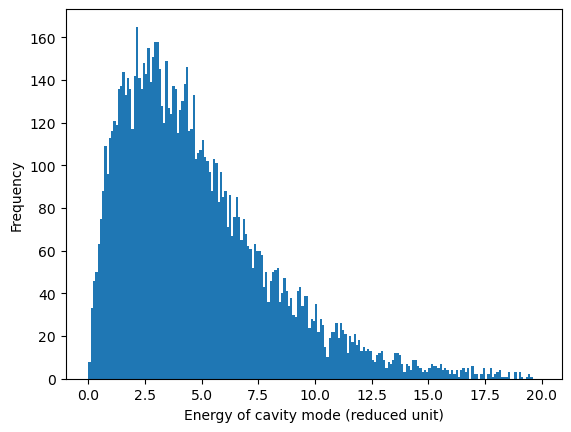

In [27]:
fig,ax = plt.subplots()

ax.hist( all_cav_energy , bins = np.arange(0,20,0.1))
ax.set_xlabel('Energy of cavity mode (reduced unit)')
ax.set_ylabel('Frequency')

fig.savefig('mode_dist.jpeg',dpi = 600)

In [ ]:
T = 292 / red.temp

amplitude = []

for i, kvec in enumerate(cavity_field.k_vector):
    kval = cavity_field.k_val[i]

    chi2_dist = Chi(2, scale = np.sqrt(T * np.pi) / kval)
    ck0 = chi2_dist.rvs(size = 2)

    theta = np.random.uniform(0, np.pi * 2)
    C = np.array([
        ck0[0] * (np.cos(theta) + 1j * np.sin(theta)),
        ck0[1] * (np.cos(theta) + 1j * np.sin(theta))
    ])
    
    amplitude.append(C)

amplitude = np.array(amplitude)

In [ ]:
cavity_field.update_amplitude(amplitude)

In [ ]:
np.mean( cavity_field.hamiltonian() / 2 )

In [ ]:
cavity_field(0, np.array([[0,0,0],[1e5,-1e3,1e4]]))